# Getting Started

This tutorial shows how to use QC-AtomDB as a Python script or library.

Learning outcomes:

- Script usage

- Atom-DB as a Python library

    - Loading/Dumping atomic species data

    - Getting properties of atomic species


## Requirements

This tutorial assumes the package has been installed and the datasets compiled. Please, check the pertinent [instructions](https://github.com/QuantumElephant/atomdb#installation) provided in the README file.

## Script usage

A basic functionality is provided through the command line interface.

* Check the command line options with:
    * `python -m atomdb -h`



* To retrieve Slater's dataset data for the neutral Carbon atom do:
    * `python -m atomdb -q slater C 0 3`

In [ ]:
import sys  
sys.path.insert(0, '../../')

## Atom-DB as a Python library

The following lines should appear at the beginning of the scripts:

In [1]:
# Import the Atom-DB library
import atomdb

# Optional modules
import numpy as np

### Loading/Dumping Data

Use the `atomdb.load` function to retrieve an atomic spcies' information.

The required inputs are: element symbol, charge and multiplicity. 

Optionally a dataset name can be specified choosing one of:

- `nist`: NIST spectroscopic data complemented with results from [Phys. Chem. Chem. Phys., 2016,18, 25721-25734](https://doi.org/10.1039/C6CP04533B)

- `slater`: Atomic orbitals and electronic denisty properties from SCF calculations using Slater basis.

- `numeric`: electronic denisty properties from numerical Hartree-fock calculations.

- `gaussian`: Atomic orbitals and electronic denisty properties from SCF calculations using gaussian basis. 

Currently we only support neutral/charged elements in its ground state, therefore, the optional parameter nexc (electronic state number) is not specified, leaving it to take its dafault value 0.

In [2]:
# Define an atomic species and load its data
element = 'Cl'
charge = 0
mult = 2
dataset = 'slater'

atom = atomdb.load(element, charge, mult, dataset=dataset)

All information stored about a specie can be outputted in a JSON file format using:

In [ ]:
# Dumping Data to a JSON string
atom.to_json()

### Getting Atomic Properties

Bellow we showcase some of the accesible scalar and vector properties (mostly related to the electron density)
 
Note that we use dictionaries for properties like the non-bonded atomic radius having more than one definition.

* Scalars

In [3]:
print("Atomic number: ", atom.natom)
print("Number of electrons: ", atom.nelec)
print("Mass [a.u.]: ", atom.mass)
print("Atomic radius [a.u.]: ", atom.vdw_radii['bondi'])

Atomic number:  17
Number of electrons:  17
Mass [a.u.]:  35.4515
Atomic radius [a.u.]:  3.307020734362191


* Vectors

In [4]:
# Atomic orbitals
print("Number of spin-orbitals (alpha): ", atom.ao.norba)
print("Energies: ", atom.ao.energy_a)
print("Occupations (alpha): ", atom.ao.occs_a)
print("Occupations (beta): ", atom.ao.occs_b)

Number of spin-orbitals (alpha):  5
Energies:  [-104.8844208  -10.6074807   -1.0729121   -8.0722274   -0.5063999]
Occupations (alpha):  [1. 1. 1. 3. 3.]
Occupations (beta):  [1. 1. 1. 3. 2.]


* Functions (electron density properties)

Two methods are available to compute density-related properties: `interpolate_dens` and `interpolate_ked`; they return spline functions (cubic splines) that can be evaluated on a radial grid.

<!-- Optionally, one can select the type of orbitals included in the calculation and take a subset of them by specifying their spin component and index, respectively (by default, all occupied alpha and beta spin-orbitals are included, `spin=ab` and `index=None`). Also, density derivatives are accessible through the `deriv` parameter passed to the splines. -->

In [5]:
# Define a uniform radial grid and evaluate the density
rad_grid = np.linspace(0., 6., num=100)
dens_spline = atom.interpolate_dens(log=True)
ked_spline = atom.interpolate_ked(log=False)

dens = dens_spline(rad_grid)
ked = ked_spline(rad_grid)

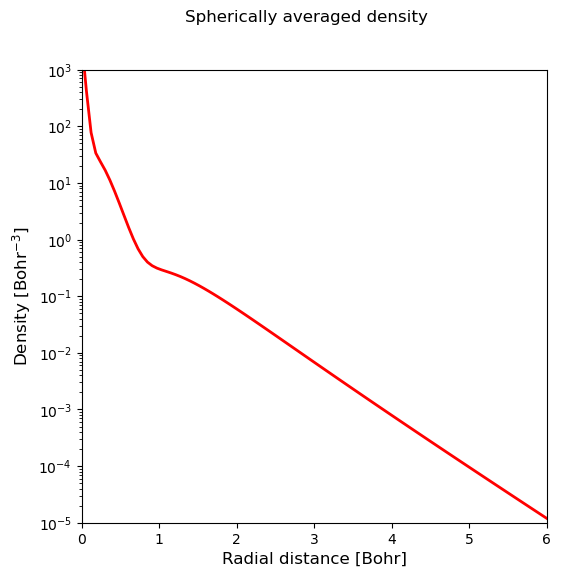

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 6), dpi=100)
ax = fig.subplots()


ax.plot(rad_grid, dens, '-r', linewidth=2)
ax.set(xlabel="Radial distance [Bohr]", ylabel="Density [Bohr$^{-3}$]")
ax.set_yscale('log')
ax.set_ylim(top=1000, bottom=0.00001)
ax.set_xlim(left=0., right=6)
fig.suptitle(f'Spherically averaged density')
plt.show()